> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset has 21 columns and 10866 rows

### Question(s) for Analysis
1. Which movie has the highest and the lowest budget?
2. Which movie has the highest and the lowest revenues?
3. Which movie has the highest and the lowest popularity?
4. Which movie has the highest and the lowest runtime?
5. Which movie has the highest and the lowest rate?
6. Which movie has the highest and lowest votes?
7. What is the most famous Genres?
8. Which genre has the highest release of movies?


In [1]:
#investigate-tmdb-dataset.ipynb

### Gather

In [2]:
#Import statements for all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


## Data Wrangling

Gather
Assess
Clean


In [3]:
# Load data

df = pd.read_csv('tmdb-movies.csv')

## Assess

In [4]:
# Checking the first few values of the dataset

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Checking the last few values of the dataset

df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# Get general info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Overall Descriptive statistics

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#Check for Duplicates

df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#check for unique values 

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Check for column names.

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Untidy issues(Consistency):
*  Drop duplicated rows

*  Change the format of release date which was in string format to datetime

### Tidiness

*  Drop the columns ['release_year', 'budget_adj', 'revenue_adj']

###  Cleaning

### Dealing with NaN values

In [11]:
# Checking for null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Remove Duplicated Rows

In [12]:
# Sum all the duplicated rows

df.duplicated().sum()

1

In [13]:
# Drop duplicates

df.drop_duplicates(inplace = True)

### Remove Rows With Missing Values

In [14]:
# Drop rows containing missing values

df.dropna(inplace=True)

### Changing the Format Of Release Date into Datetime Format

In [15]:
# The dataset is in string format, that's why we need to change the release date

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [16]:
# Check the data type 

df.release_date.dtype

dtype('<M8[ns]')

### Remove Unused Columns

In [17]:
# Remove columns that are not needed
#movies_clean.drop(columns=['release_year', 'budget_adj','revenue_adj'], inplace = True)

df.drop(columns=['budget', 'revenue', 'overview', 'imdb_id', 'homepage', 'tagline'], inplace = True)

In [19]:
# Check for zero values in the budget and revenue columns

print("Rows With Zero Values In The Budget_adj Column:",df[(df['budget_adj']==0)].shape[0])
print("Rows With Zero Values In The Revenue_adj Column:",df[(df['revenue_adj']==0)].shape[0])

Rows With Zero Values In The Budget_adj Column: 546
Rows With Zero Values In The Revenue_adj Column: 546


### Remove duplicates in the title column

In [20]:
# We observed that there are duplicates in the original title column even if the column's data is unique

df['original_title'].duplicated().sum()

12

In [21]:
# Let's drop the duplicates in the original title column

df.drop_duplicates(subset=['original_title'], inplace=True)

### Print a concise summary of the DataFrame

In [22]:
# Check if there are nulls that we didn't remove

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 10819
Data columns (total 15 columns):
id                      1980 non-null int64
popularity              1980 non-null float64
original_title          1980 non-null object
cast                    1980 non-null object
director                1980 non-null object
keywords                1980 non-null object
runtime                 1980 non-null int64
genres                  1980 non-null object
production_companies    1980 non-null object
release_date            1980 non-null datetime64[ns]
vote_count              1980 non-null int64
vote_average            1980 non-null float64
release_year            1980 non-null int64
budget_adj              1980 non-null float64
revenue_adj             1980 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 247.5+ KB


In [23]:
# Concatenating genre

df = pd.concat([df, df["genres"].str.get_dummies(sep="|")], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 10819
Data columns (total 35 columns):
id                      1980 non-null int64
popularity              1980 non-null float64
original_title          1980 non-null object
cast                    1980 non-null object
director                1980 non-null object
keywords                1980 non-null object
runtime                 1980 non-null int64
genres                  1980 non-null object
production_companies    1980 non-null object
release_date            1980 non-null datetime64[ns]
vote_count              1980 non-null int64
vote_average            1980 non-null float64
release_year            1980 non-null int64
budget_adj              1980 non-null float64
revenue_adj             1980 non-null float64
Action                  1980 non-null int64
Adventure               1980 non-null int64
Animation               1980 non-null int64
Comedy                  1980 non-null int64
Crime                   1980 non-

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0,0,0,0,0,1,0,1,0,0
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,0,0,0,0,0,1,0,1,0,0
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,0,0,0,0,0,1,0,1,0,0
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,0,0,0,0,0,1,0,0,0,0
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,0,0,0,0,0,0,0,1,0,0


### Exploratory Data Analysis

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Firstly, let's look at the correlation between each two variables with the scatter matrix.

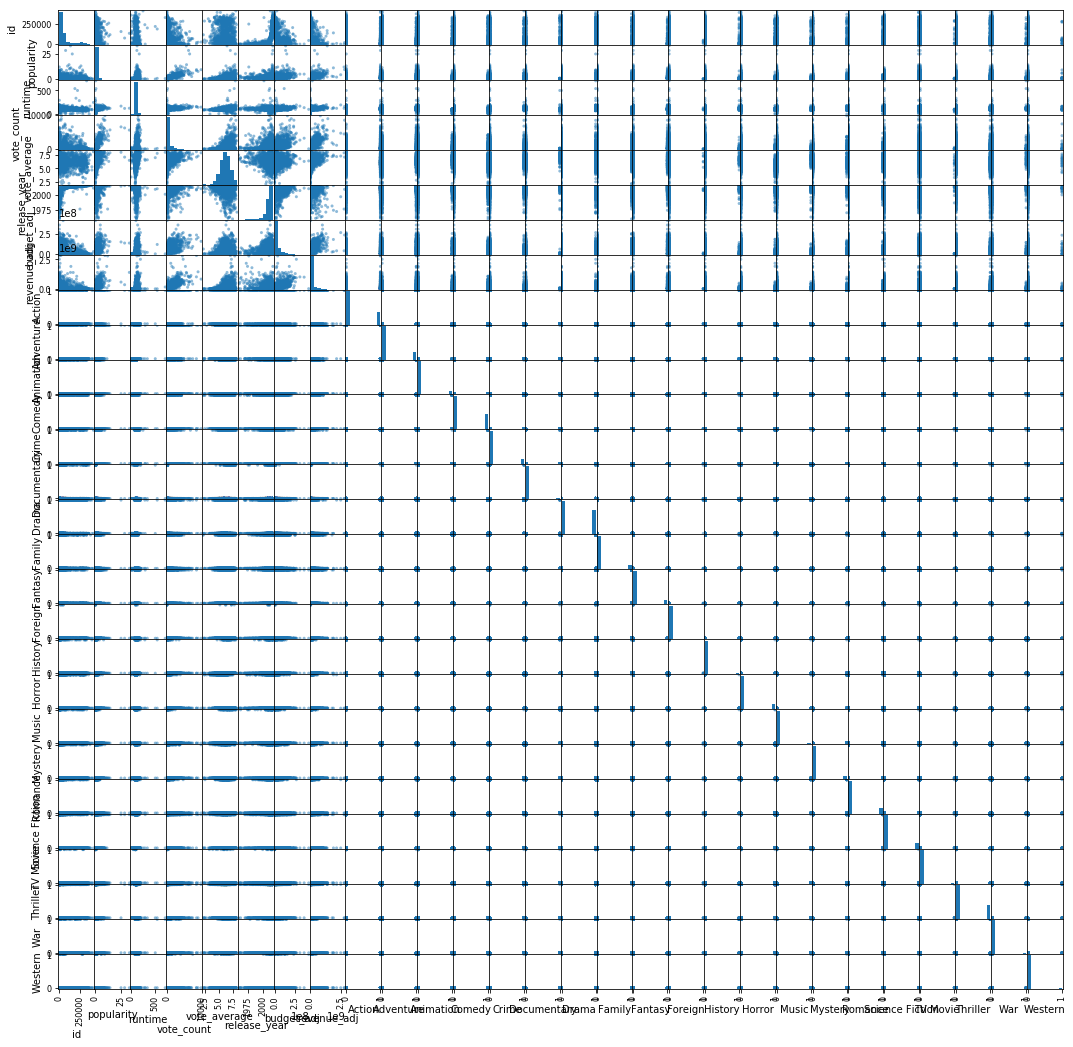

In [25]:
# Draw a matrix of scatter plots

pd.plotting.scatter_matrix(df, figsize=(18,18));

### Research Question 1:  Which movie has the highest and the lowest budget?

In [26]:
# Identifying a specified row, sorting the DataFrame by the highest value for the adjusted budget column

df.nlargest(1, 'budget_adj')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
2244,46528,0.25054,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,...,0,0,0,0,0,0,0,1,0,1


### The movie with the highest budget is: The Warrior's Way

In [27]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the adjusted budget column

df.nsmallest(1, 'budget_adj')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
30,280996,3.927333,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,...,0,0,0,1,0,0,0,0,0,0


### The movie with the lowest budget is: Holmes

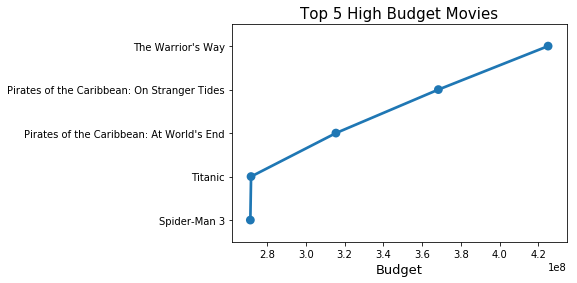

In [29]:
info = pd.DataFrame(df['budget_adj'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 5 movies with high budget data from the list and dataframe.
x = list(data[:5])
y = list(info['budget_adj'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 2:  Which movie has the highest and the lowest revenue?

In [30]:
# Identifying a specified row, sorting the DataFrame by the highest value for the adjusted revenue column

df.nlargest(1, 'revenue_adj')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,...,0,0,0,0,0,1,0,0,0,0


### The movie that has the highest revenue is: Avatar

In [31]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the adjusted budget column

df.nsmallest(1, 'revenue_adj')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
67,334074,2.331636,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,...,0,0,0,0,0,0,0,1,0,0


### The movie that has the lowest revenue is: Survivor 

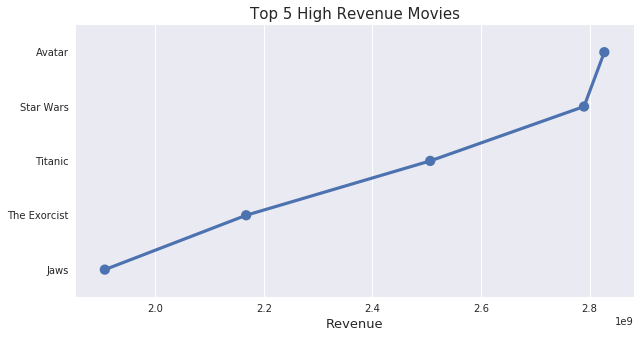

In [32]:
info = pd.DataFrame(df['revenue_adj'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:5])
y = list(info['revenue_adj'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")


### Research Question 3:  Which movie has the highest and the lowest popularity?

In [33]:
# Identifying a specified row, sorting the DataFrame by the highest value for the popularity column

df.nlargest(1, 'popularity')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0,0,0,0,0,1,0,1,0,0


### Here, we can see that Jurasic World movie is the most popular movie

In [34]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the popularity column

df.nsmallest(1, 'popularity')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
6080,174323,0.00062,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,Darren Stein,gay|gay kiss|coming out|high school|friends,92,Comedy,School Pictures|Parting Shots Media|Logolite E...,2013-10-20,...,0,0,0,0,0,0,0,0,0,0


### Here, we can see that G.B.F movie is the least popular movie

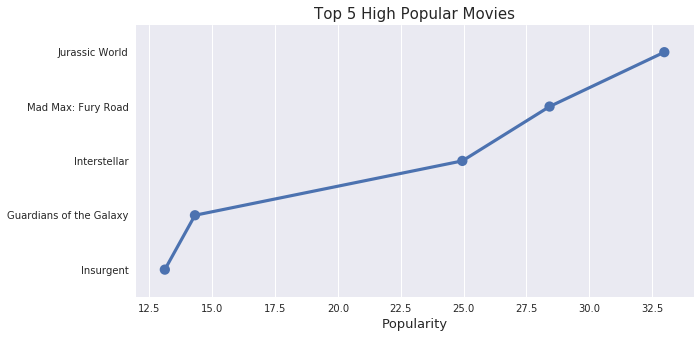

In [35]:
info = pd.DataFrame(df['popularity'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 5 movies with high popularity data from the list and dataframe.
x = list(data[:5])
y = list(info['popularity'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Popular Movies",fontsize = 15)
ax.set_xlabel("Popularity",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 4:  Which movie has the highest and the lowest runtime?

In [36]:
# Identifying a specified row, sorting the DataFrame by the highest value for the runtime column

df.nlargest(1, 'runtime')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
2722,331214,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705,Action|Drama|War,HBO,2001-09-09,...,0,0,0,0,0,0,0,0,1,0


### The longest movie is: Band of Brothers

In [37]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the runtime column

df.nsmallest(1, 'runtime')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,...,0,0,0,0,0,0,0,0,0,0


### The shortest movie is: Ronaldo

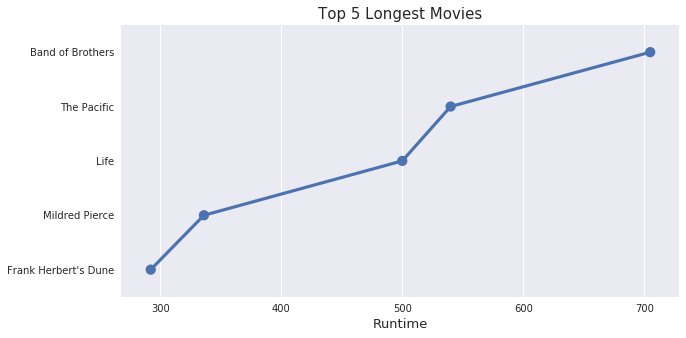

In [38]:

info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 5 longest duraton movies data from the list and dataframe.
x = list(data[:5])
y = list(info['runtime'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 5:   Which movie has the highest and lowest rate?

In [40]:
# Identifying a specified row, sorting the DataFrame by the highest value for the rate column

df.nlargest(1, 'vote_average')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
7269,238,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,italy|love at first sight|loss of father|patri...,175,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,...,0,0,0,0,0,0,0,0,0,0


### The movie with the highest rate is: The Godfather

In [41]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the rate column

df.nsmallest(1, 'vote_average')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
7220,31117,0.157959,Superbabies: Baby Geniuses 2,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,Bob Clark,baby|baseball|scientific study|computer|genius,88,Family|Comedy,Crystal Sky Worldwide|Triumph Films,2004-08-27,...,0,0,0,0,0,0,0,0,0,0


### The movie with the lowest rate is: Superbabies: Baby Genuises 2

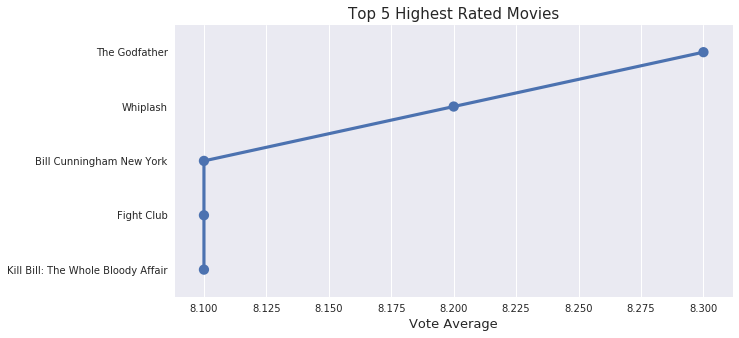

In [42]:
info = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 5 highly rated movies data from the list and dataframe.
x = list(data[:5])
y = list(info['vote_average'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

In [43]:
### Research Question 6   Which movie has the highest and lowest votes?

In [44]:
# Identifying a specified row, sorting the DataFrame by the highest value for the vote_count column

df.nlargest(1, 'vote_count')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1919,27205,9.363643,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,loss of lover|dream|sleep|subconsciousness|heist,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,...,0,0,0,1,0,1,0,1,0,0


### The movie with the highest vote is: Inception

In [45]:
# Identifying a specified row, sorting the DataFrame by the smallest value for the vote_count column

df.nsmallest(1, 'vote_count')

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1014,293894,0.512023,Viking: The Berserkers,Sol Heras|Anthony Baines|Kezia Burrows|Nick Co...,Antony Smith,viking|man hunt|battle for survival|berserkers...,89,Thriller|Horror,Lindisfarne SPV1,2014-09-15,...,0,1,0,0,0,0,0,1,0,0


### The movie with the lowest vote is: Viking: The Berserkers

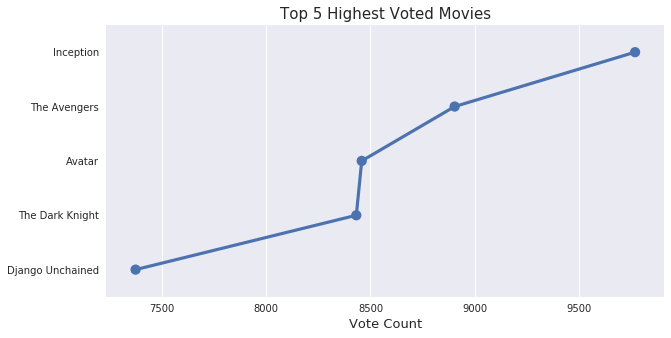

In [46]:
info = pd.DataFrame(df['vote_count'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 5 highly rated movies data from the list and dataframe.
x = list(data[:5])
y = list(info['vote_count'][:5])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 Highest Voted Movies",fontsize = 15)
ax.set_xlabel("Vote Count",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

### Research Question 7: What are the top movies for each genre?

In [48]:
df.groupby(['genres']).sum().sort_values(by=['vote_count'], ascending=False)


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
genres,,,,,,,,,,,,,,,,,,,,,
Drama,11801285,107.406988,14576,43670,831.2,255153,2.070810e+09,7.569691e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure|Fantasy|Action,139274,52.432370,1619,40126,73.8,22077,1.653371e+09,8.223861e+09,11,11,...,0,0,0,0,0,0,0,0,0,0
Comedy,6952213,100.448838,10311,38751,609.0,210916,2.321551e+09,7.674928e+09,0,0,...,0,0,0,0,0,0,0,0,0,0
Action|Adventure|Science Fiction,776688,40.311399,886,25553,44.3,14092,1.059988e+09,4.397922e+09,7,7,...,0,0,0,0,0,7,0,0,0,0
Adventure|Action|Science Fiction,110790,39.440355,1001,24402,55.1,15973,8.990707e+08,8.827192e+09,8,8,...,0,0,0,0,0,8,0,0,0,0
Action|Science Fiction|Adventure,276686,24.919386,664,21529,35.0,10057,8.109979e+08,3.109716e+09,5,5,...,0,0,0,0,0,5,0,0,0,0
Action|Adventure|Fantasy|Science Fiction,247506,21.427893,860,18739,33.7,10048,9.540265e+08,4.404563e+09,5,5,...,0,0,0,0,0,5,0,0,0,0
Science Fiction|Action|Adventure,307288,21.485045,687,18681,32.8,10063,7.773965e+08,3.113953e+09,5,5,...,0,0,0,0,0,5,0,0,0,0
Action|Science Fiction,1079975,24.246174,857,18122,50.7,16082,5.371467e+08,2.010978e+09,8,0,...,0,0,0,0,0,8,0,0,0,0


### Here, we can see the list of the top movies for each genres

### Research Question 8: Which genre has the highest release of movies?

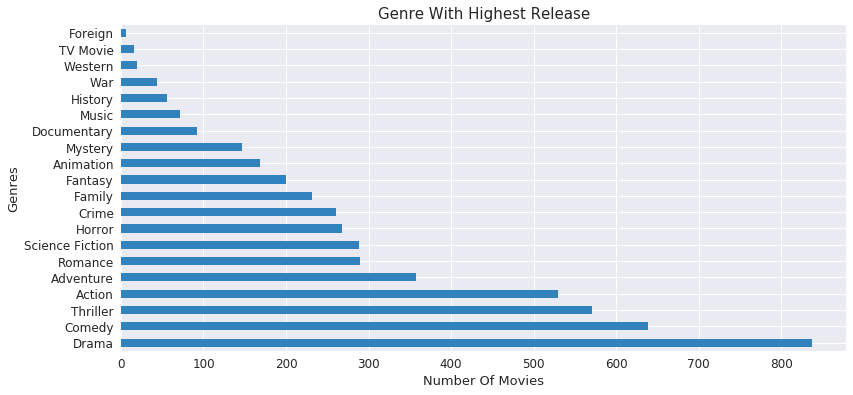

In [50]:
# Make a function that will split the string and return the count of each genre
def count_genre(x):
    # We will now concatenate all the rows of the genres
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    # let's counts each of the genre and return
    info = data.value_counts(ascending=False)
    return info

# Let's call the function for counting the movies of each genre
total_genre_movies = count_genre('genres')
# Plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

# Now, let's setup the title and the labels of the plot
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")


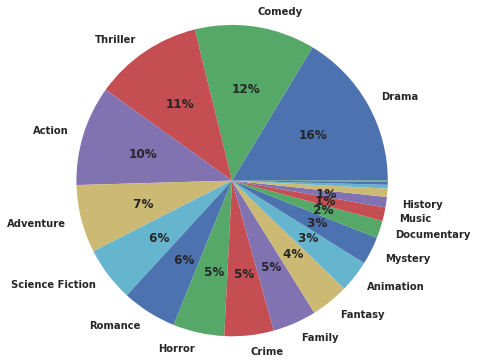

In [153]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

### Here, we can see that drama has the highest genre

<a id='conclusions'></a>
## Conclusions

  In the first section, the data was gathered, assessed and cleaned and then deduced some answers to the questions listed above.
  The analysis contains the answer to the following questions:
  
    * Which movie has the highest and the lowest budget?
    
    * Which movie has the highest and the lowest revenues?
    
    * Which movie has the highest and the lowest popularity?
    
    * Which movie has the highest and the lowest runtime?
    
    * Which movie has the highest and the lowest rate?
    
    * Which movie has the highest and lowest votes?
    
    * What are the movies for each genres?
    
    * Which genre has the highest release of movies?
    
    
    
 Limitations
 
    . This dataset has some missing values for the budget, revenue and profit.
    
    . Some values are encoded in a wrong way. I didn't drop them as they are useful to answer other questions.
    
    . The charachteristics of the movie does not guarantee the success or the faliure of it.
    

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0